In [5]:
from skimage import morphology
from scipy import ndimage
from os import listdir
import PIL
import skimage
import PIL.ImageOps

In [6]:
path = ['D:\jupyter_notebooks\imgs\err_new/',
        'D:/jupyter_notebooks/imgs/nor_new/']

In [7]:
len(listdir(path[0])),len(listdir(path[1]))
print('num of pics are : ' +  str(len(listdir(path[0])) + len(listdir(path[1]))))

num of pics are : 142


In [8]:
get_files = listdir(path[0])
get_files

['E02 (1).jpg',
 'E02 (10).jpg',
 'E02 (15).jpg',
 'E02 (16).jpg',
 'E02 (17).jpg',
 'E02 (18).jpg',
 'E02 (2).jpg',
 'E02 (20).jpg',
 'E02 (21).jpg',
 'E02 (22).jpg',
 'E02 (23).jpg',
 'E02 (24).jpg',
 'E02 (25).jpg',
 'E02 (26).jpg',
 'E02 (27).jpg',
 'E02 (28).jpg',
 'E02 (29).jpg',
 'E02 (3).jpg',
 'E02 (30).jpg',
 'E02 (31).jpg',
 'E02 (32).jpg',
 'E02 (33).jpg',
 'E02 (34).jpg',
 'E02 (35).jpg',
 'E02 (36).jpg',
 'E02 (37).jpg',
 'E02 (38).jpg',
 'E02 (39).jpg',
 'E02 (4).jpg',
 'E02 (40).jpg',
 'E02 (41).jpg',
 'E02 (42).jpg',
 'E02 (5).jpg',
 'E02 (6).jpg',
 'E02 (7).jpg',
 'E02 (8).jpg',
 'E02 (9).jpg',
 'IMG_1657.JPG',
 'IMG_1658.JPG',
 'IMG_1662.JPG',
 'IMG_1663.JPG',
 'IMG_1664.JPG',
 'IMG_1665.JPG',
 'IMG_1678.JPG',
 'IMG_1684.JPG',
 'IMG_1685.JPG',
 'IMG_1686.JPG',
 'IMG_1687.JPG',
 'IMG_1689.JPG',
 'IMG_1693.JPG',
 'IMG_1733.JPG',
 'IMG_1753.JPG',
 'IMG_1754.JPG',
 'IMG_1755.JPG',
 'IMG_1759.JPG',
 'IMG_1760.JPG',
 'IMG_1761.JPG',
 'IMG_1762.JPG',
 'IMG_1946.JPG',
 'IMG_

In [9]:
get_files = listdir(path[0])
get_files.sort()
for i,file in enumerate(get_files):
    if file.find('.JPG') + file.find('jpg') == -2:
        print(i,get_files.pop(i))
get_files

['E02 (1).jpg',
 'E02 (10).jpg',
 'E02 (15).jpg',
 'E02 (16).jpg',
 'E02 (17).jpg',
 'E02 (18).jpg',
 'E02 (2).jpg',
 'E02 (20).jpg',
 'E02 (21).jpg',
 'E02 (22).jpg',
 'E02 (23).jpg',
 'E02 (24).jpg',
 'E02 (25).jpg',
 'E02 (26).jpg',
 'E02 (27).jpg',
 'E02 (28).jpg',
 'E02 (29).jpg',
 'E02 (3).jpg',
 'E02 (30).jpg',
 'E02 (31).jpg',
 'E02 (32).jpg',
 'E02 (33).jpg',
 'E02 (34).jpg',
 'E02 (35).jpg',
 'E02 (36).jpg',
 'E02 (37).jpg',
 'E02 (38).jpg',
 'E02 (39).jpg',
 'E02 (4).jpg',
 'E02 (40).jpg',
 'E02 (41).jpg',
 'E02 (42).jpg',
 'E02 (5).jpg',
 'E02 (6).jpg',
 'E02 (7).jpg',
 'E02 (8).jpg',
 'E02 (9).jpg',
 'IMG_1657.JPG',
 'IMG_1658.JPG',
 'IMG_1662.JPG',
 'IMG_1663.JPG',
 'IMG_1664.JPG',
 'IMG_1665.JPG',
 'IMG_1678.JPG',
 'IMG_1684.JPG',
 'IMG_1685.JPG',
 'IMG_1686.JPG',
 'IMG_1687.JPG',
 'IMG_1689.JPG',
 'IMG_1693.JPG',
 'IMG_1733.JPG',
 'IMG_1753.JPG',
 'IMG_1754.JPG',
 'IMG_1755.JPG',
 'IMG_1759.JPG',
 'IMG_1760.JPG',
 'IMG_1761.JPG',
 'IMG_1762.JPG',
 'IMG_1946.JPG',
 'IMG_

In [10]:
## PIL.Image 개체를 바이너라이즈(이진화 시킴)
def make_bw (x):
    img_ret= x.point(lambda c : 255 if c >127 else 0)
    return img_ret

In [11]:
img = path[0] + get_files[4]

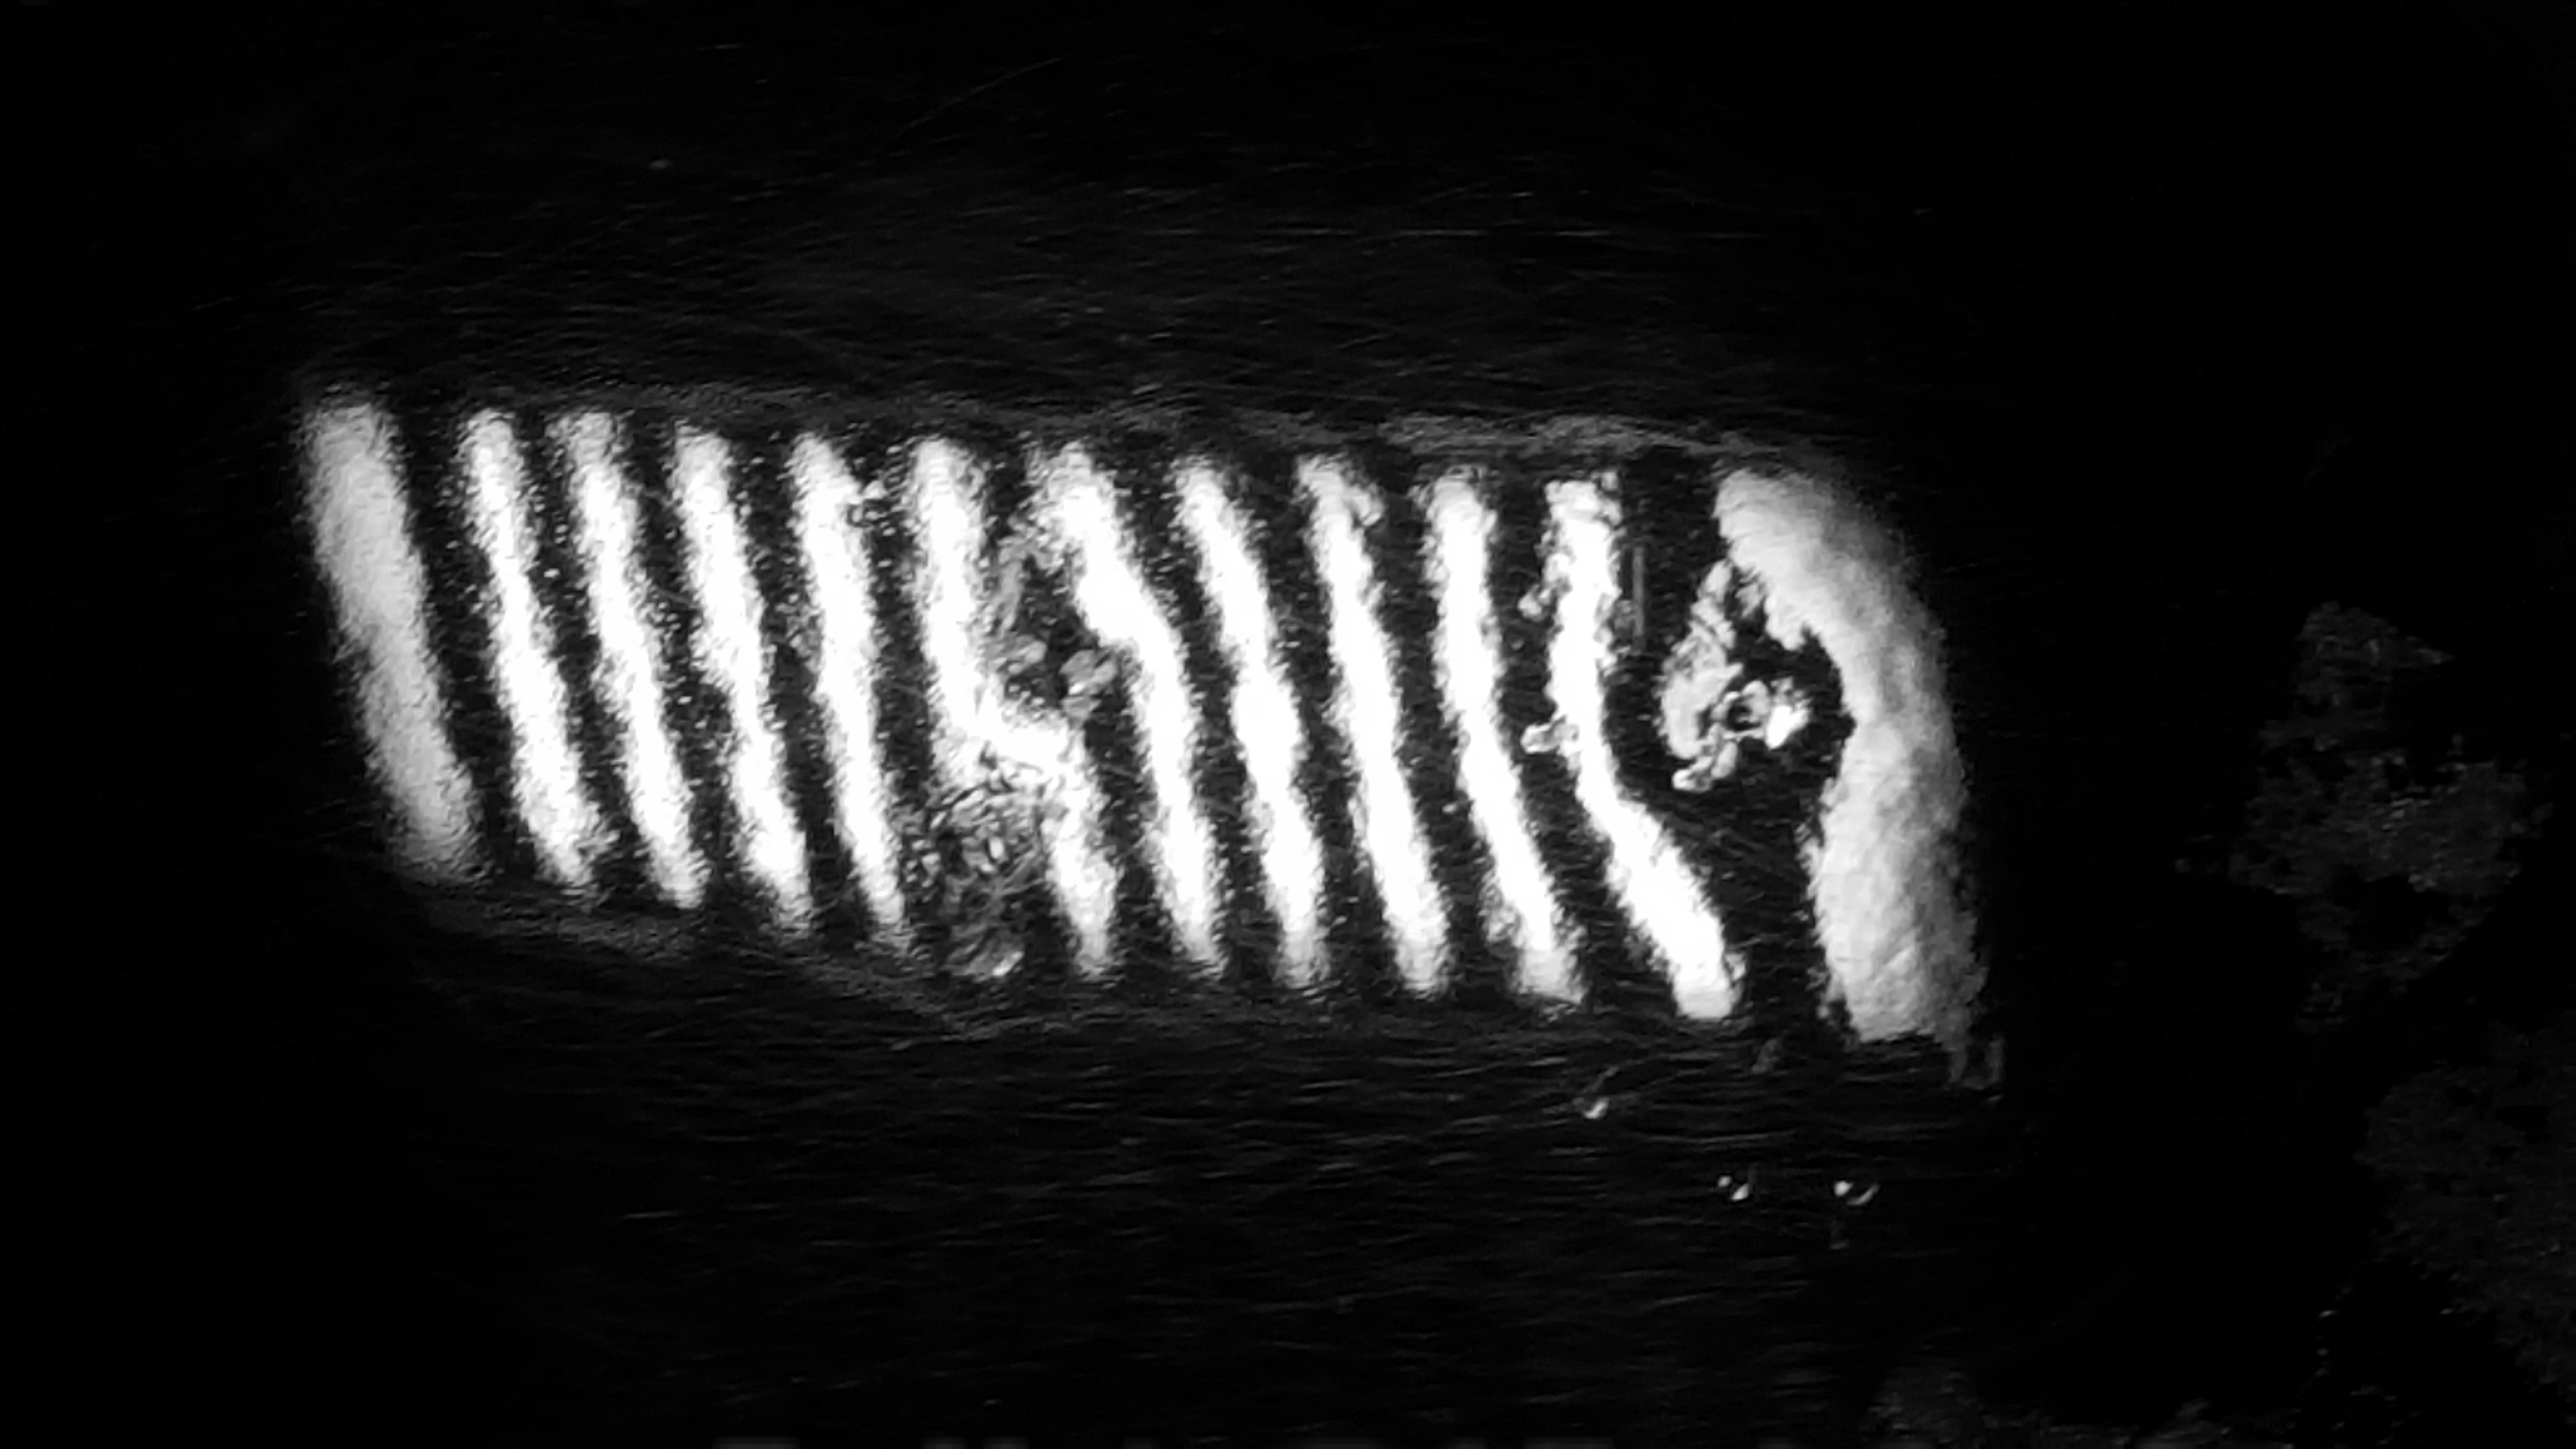

In [12]:
Pa = PIL.Image.open(img).convert('L')
a = np.array(Pa)
Pa

## Denoising

### Gamma control - grid search

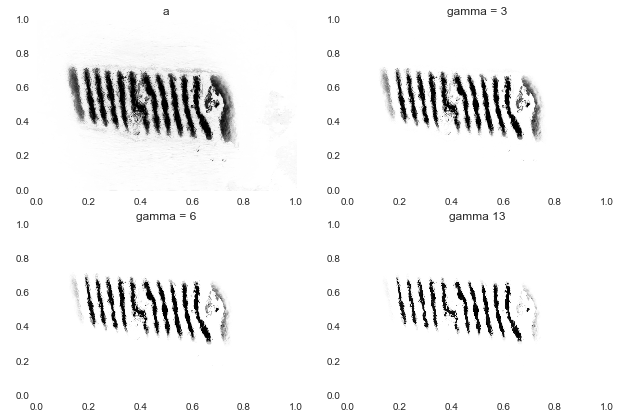

In [13]:
fig,axes = plt.subplots(2,2)
((ax1, ax2), (ax3, ax4)) = axes

fig.add_subplot(221,label = 'a')
plt.imshow(a)
ax1.set_title('a')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(222,label = 'gamma = 3')
plt.imshow((a/255)**3)
ax2.set_title('gamma = 3')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(223,label = 'gamma = 6')
plt.imshow((a/255)**6)
ax3.set_title( 'gamma = 6')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(224,label ='gamma 13')
plt.imshow((a/255)**13)
ax4.set_title('gamma 13')
plt.axis('off')
plt.axis('tight')

fig.subplots_adjust(left=0.01,top=0.95,bottom = 0,right=1)

### gray scaled

In [14]:
len(Pa.point(lambda x : x+ 60 if x>127 else  x  ).histogram())

256

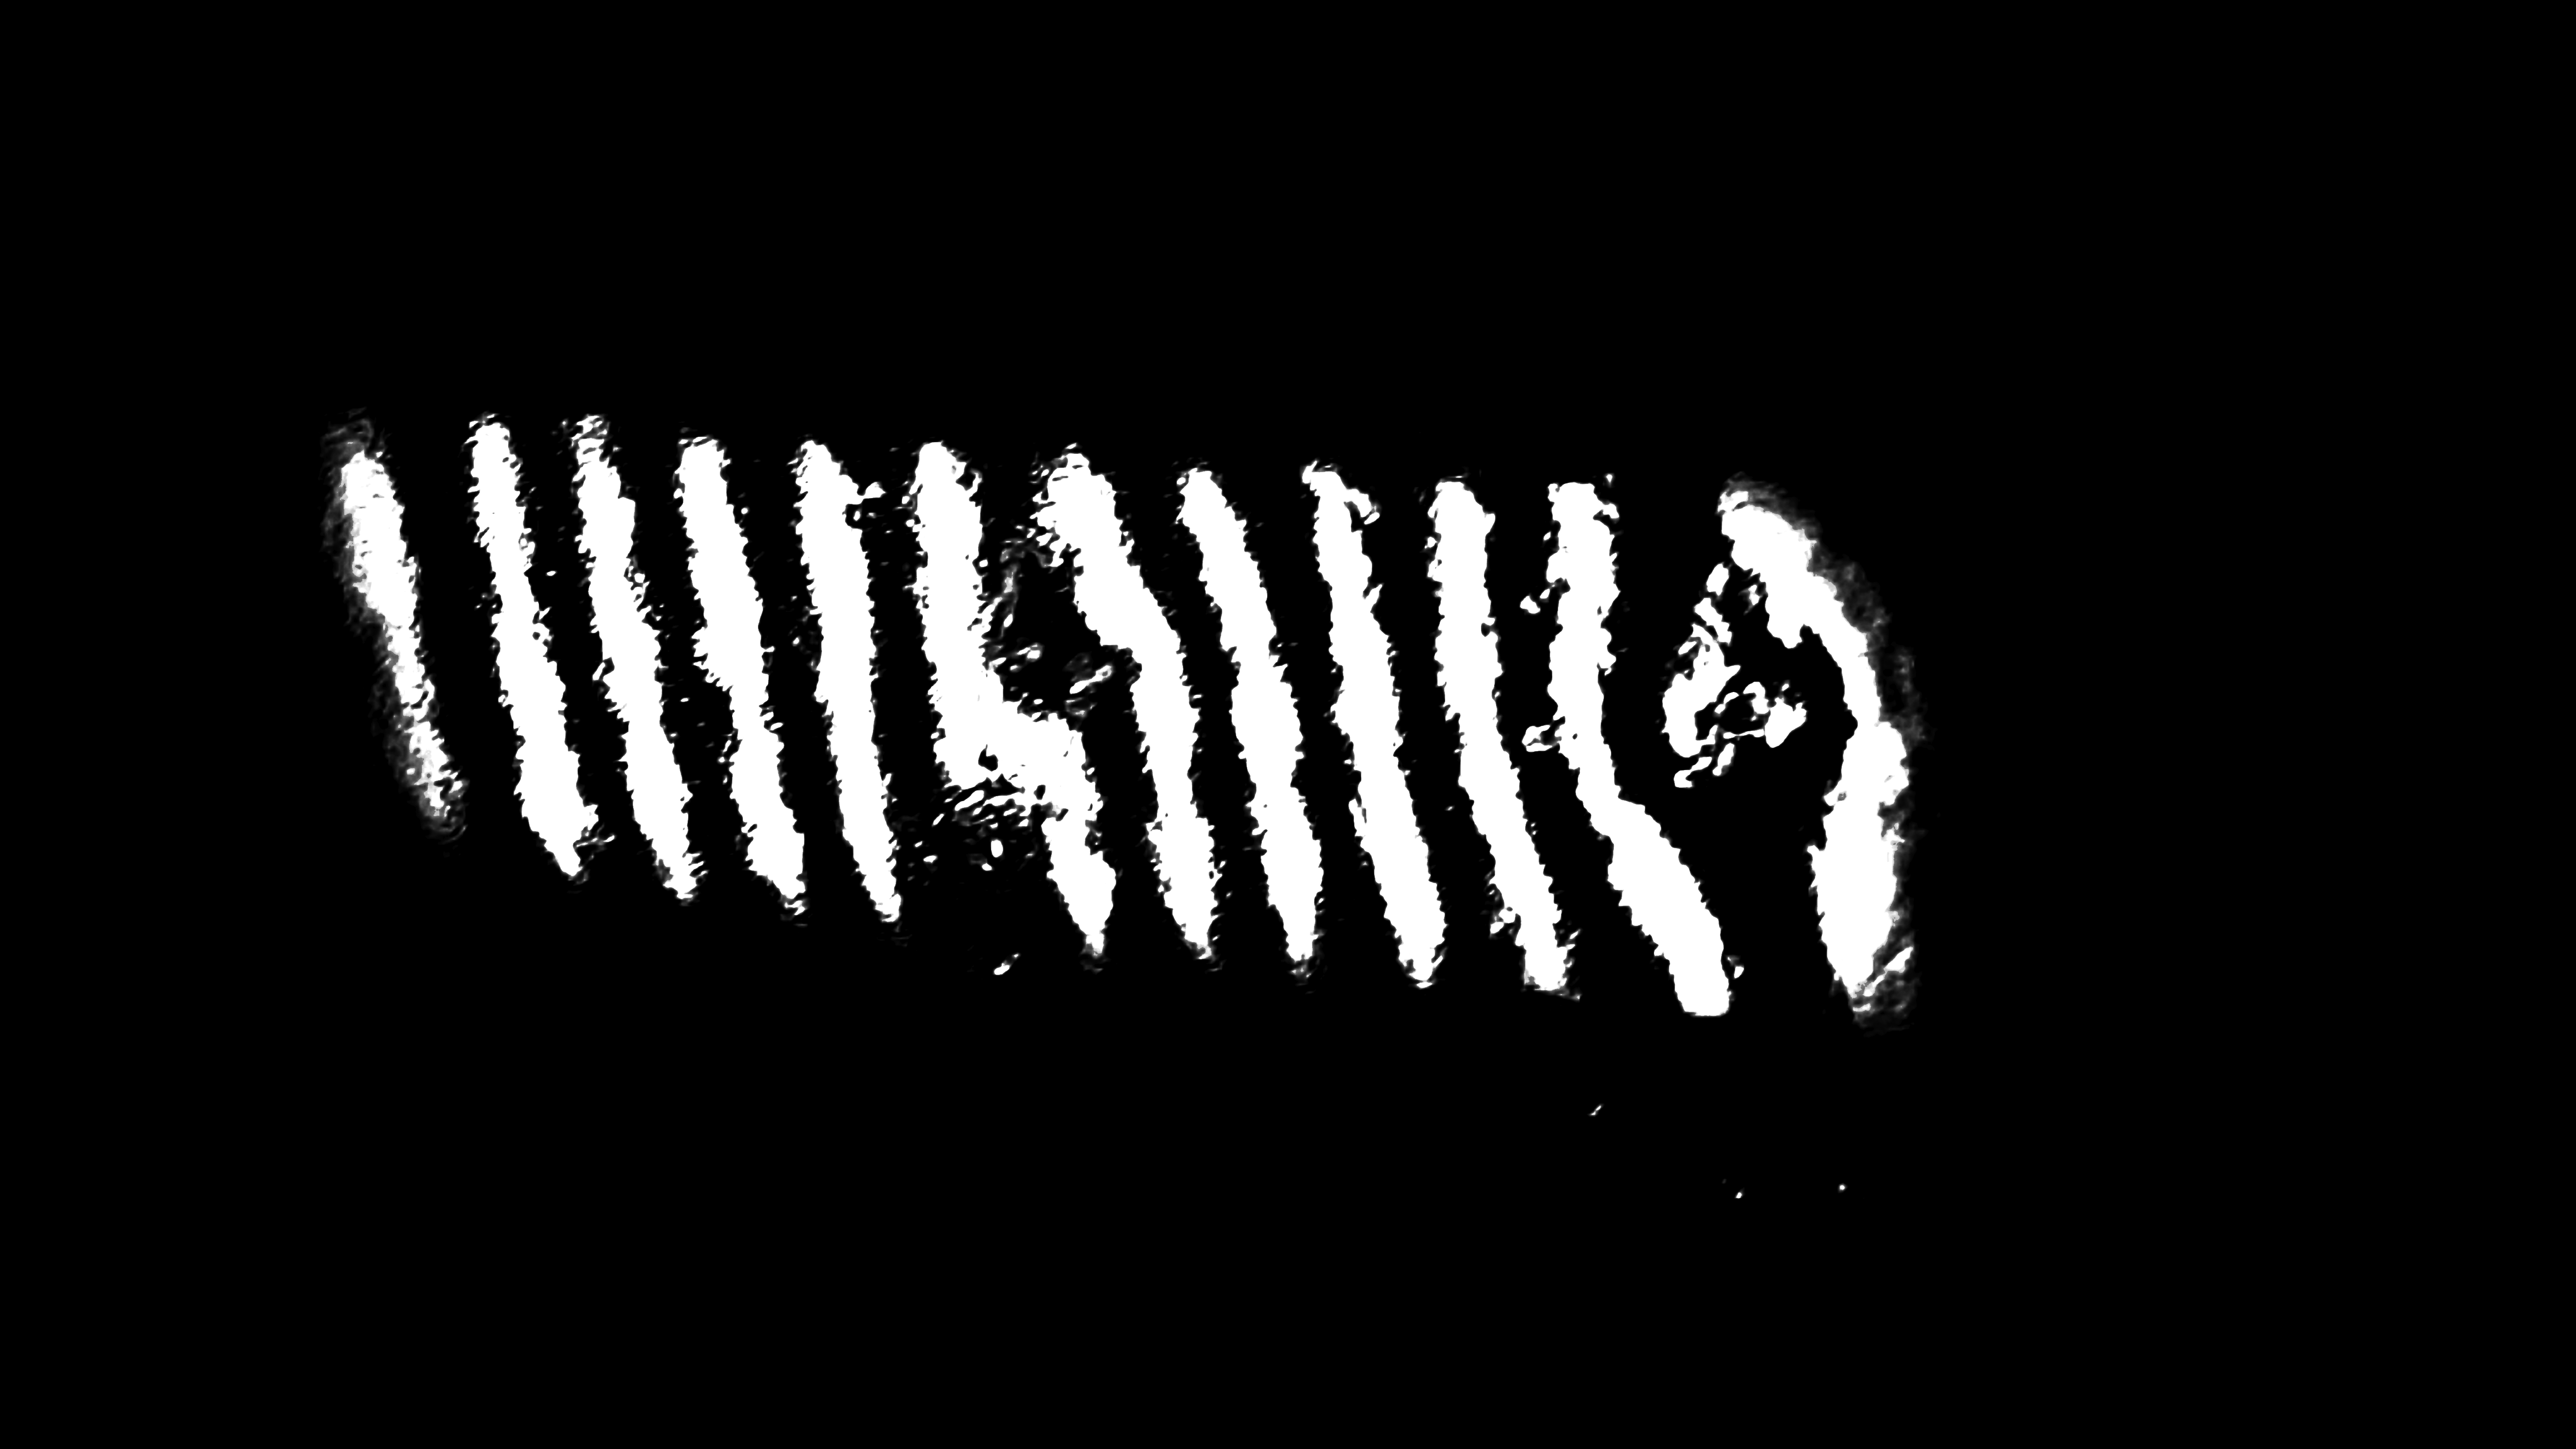

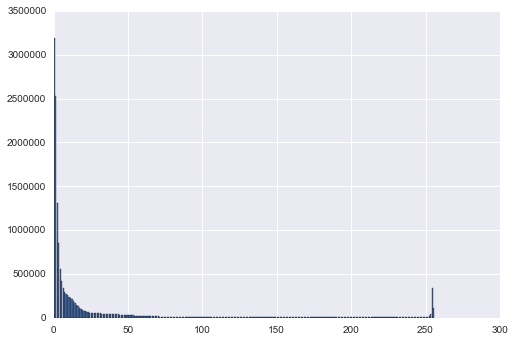

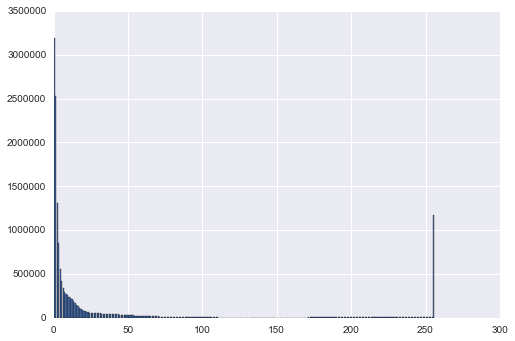

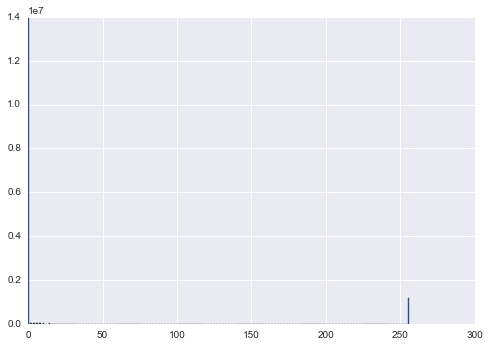

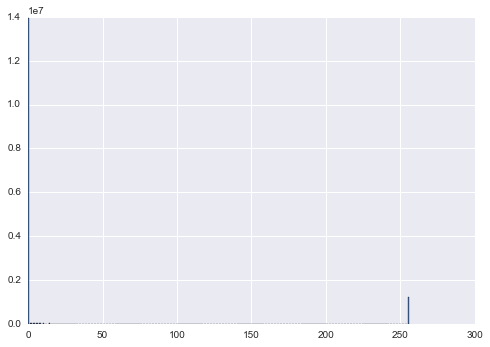

In [15]:
ps_new = Pa.copy()
plt.bar(range(256),Pa.histogram())
plt.figure()
plt.bar(range(256),Pa.point(lambda x : x+ 60 if x>110 else  x).histogram())
plt.figure()
plt.bar(range(256),Pa.point(lambda x : x+ 60 if x>110 else  x).point(lambda x : 255*(x/255)**13).histogram())
# Pa.point(lambda x : x+ 60 if x>127 else  x).point(lambda x : 255*(x/255)**13)
plt.figure()
plt.bar(range(256),Pa.point(lambda x : x+ 60 if x>110 else  x).point(lambda x : 255*(x/255)**13).point(lambda x : x+ 60 if x>110 else  x).histogram())
Pa.point(lambda x : x+ 60 if x>127 else  x).point(lambda x : 255*(x/255)**13).point(lambda x : x+ 60 if x>127 else  x)
# point(lambda x : 255*(x/255)**13 ).point()

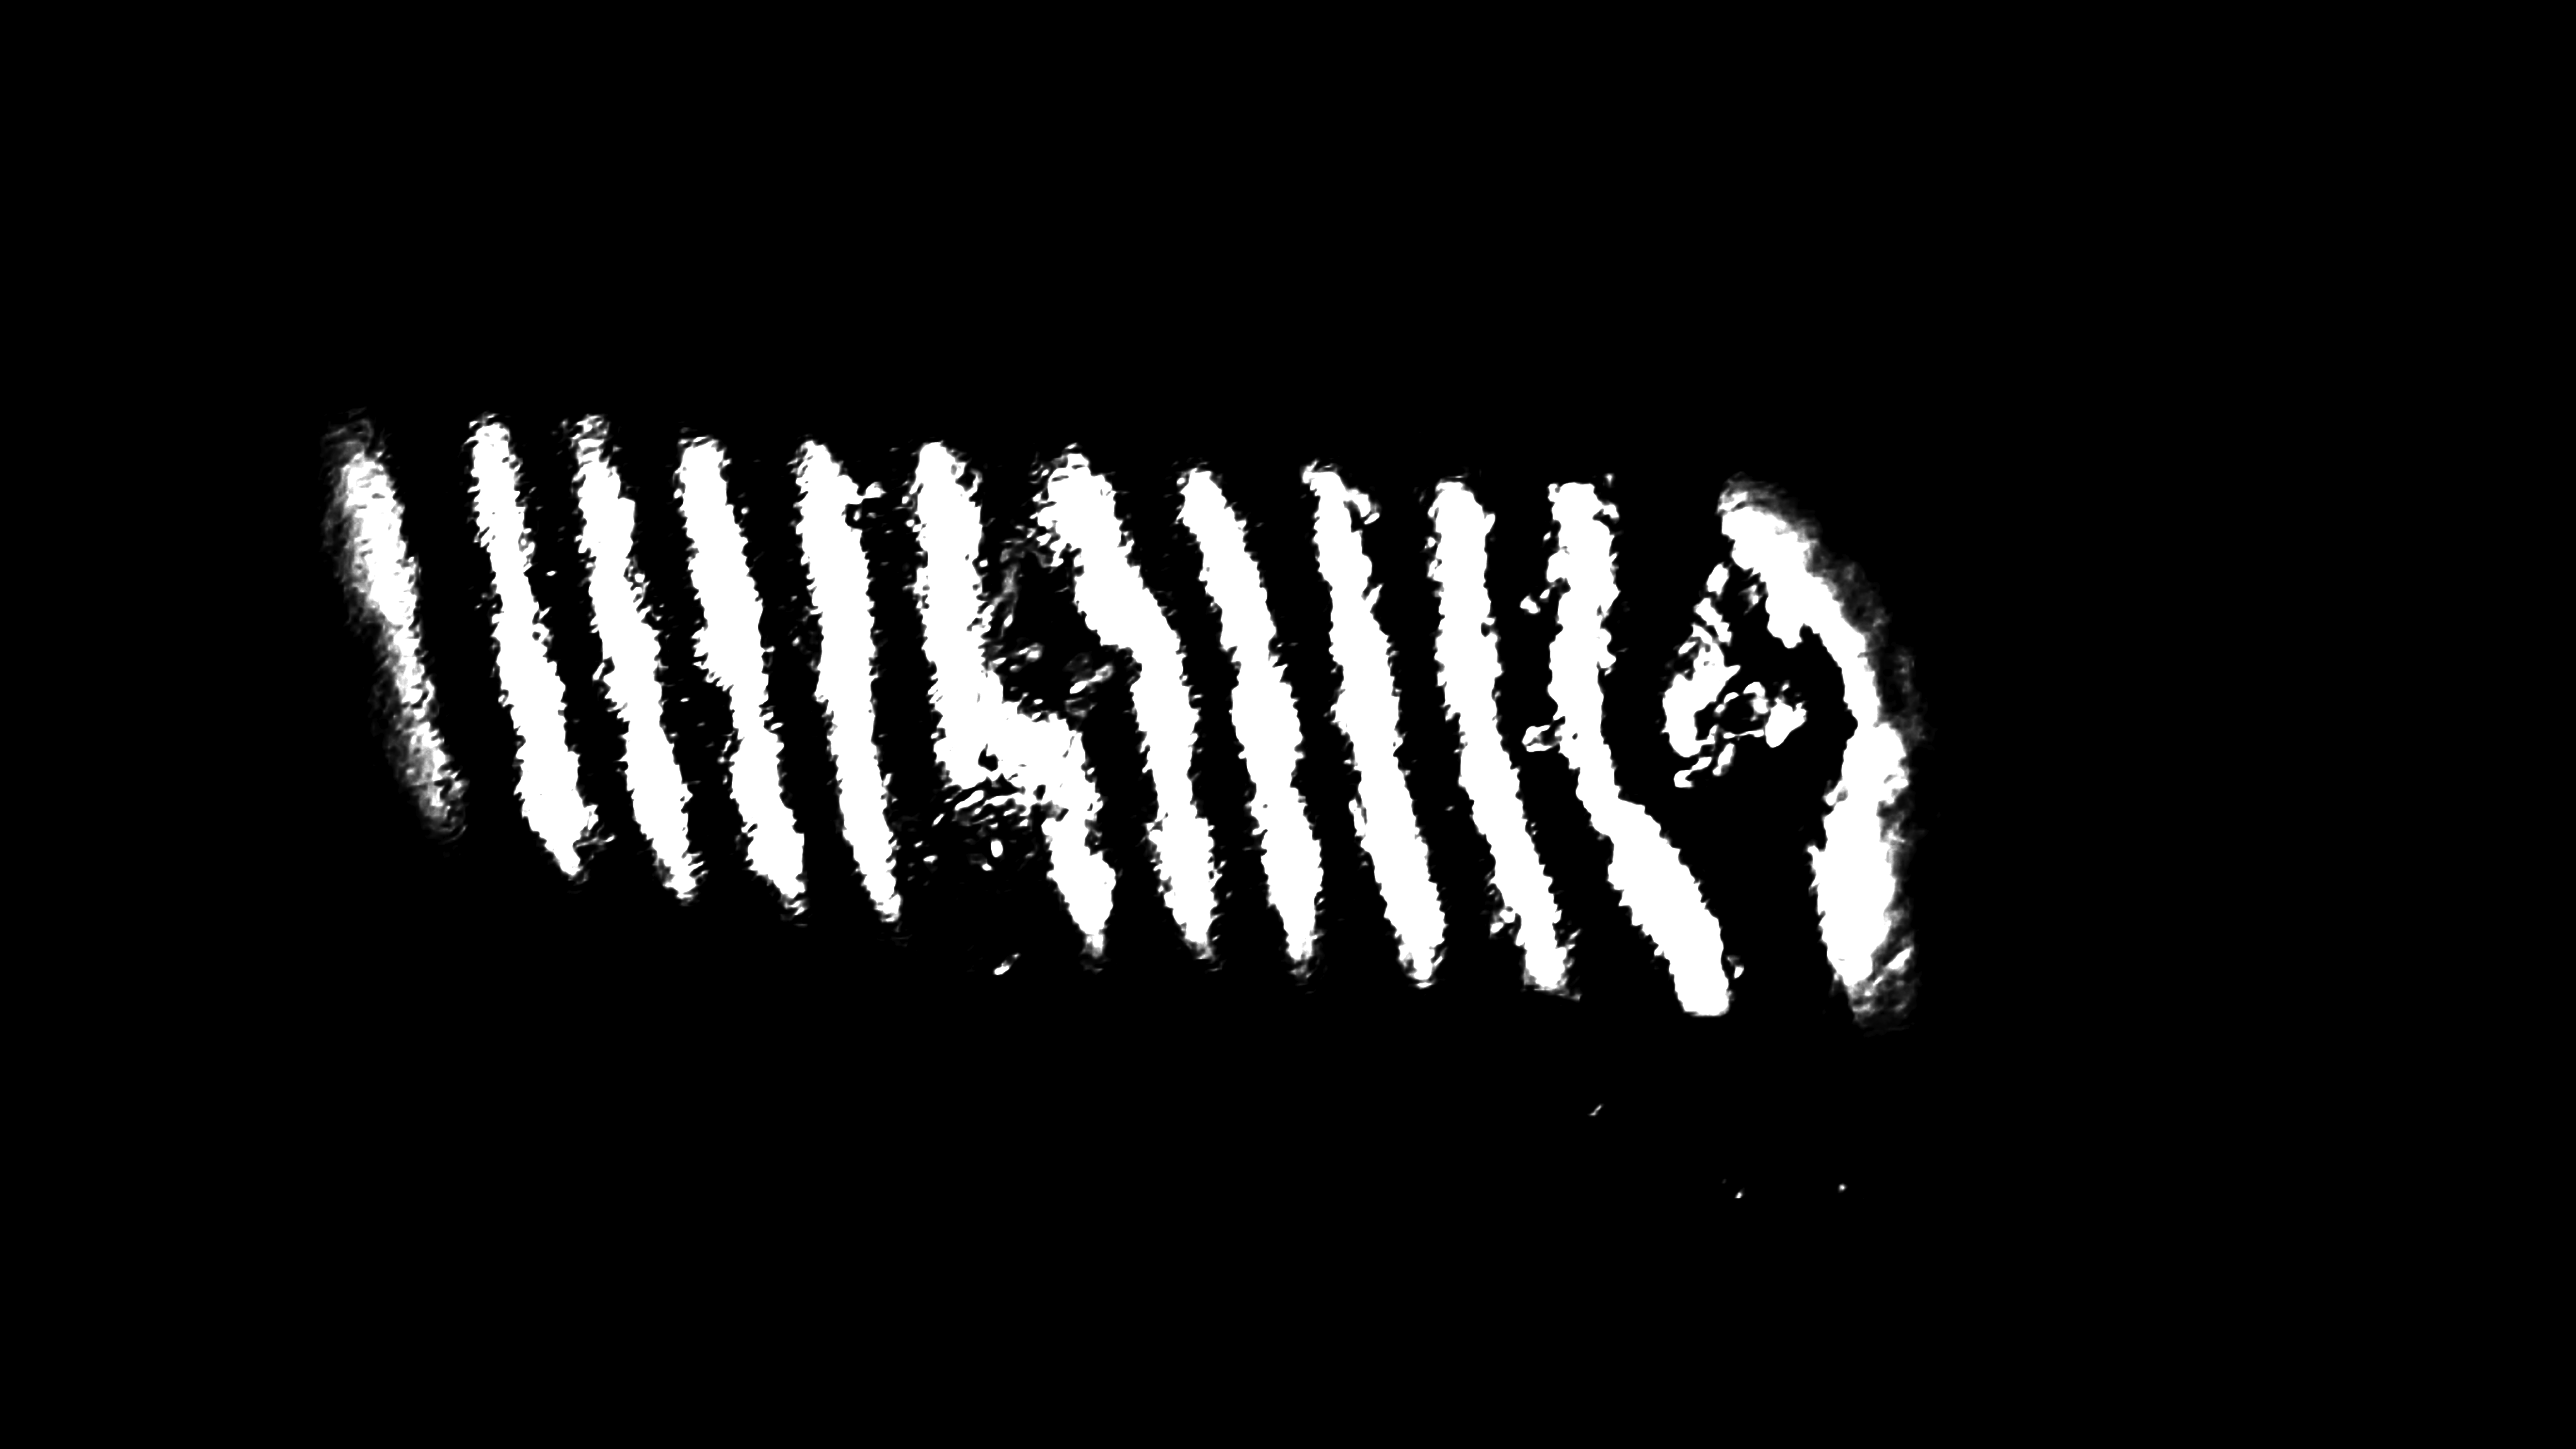

In [16]:
ps_new2 = Pa.convert('L').point(lambda x : x+ 60 if x>127 else  x  ).point(lambda x : 255*(x/255)**13 )
ps_new2

In [17]:
ps_new_inv = PIL.ImageOps.invert(ps_new2)

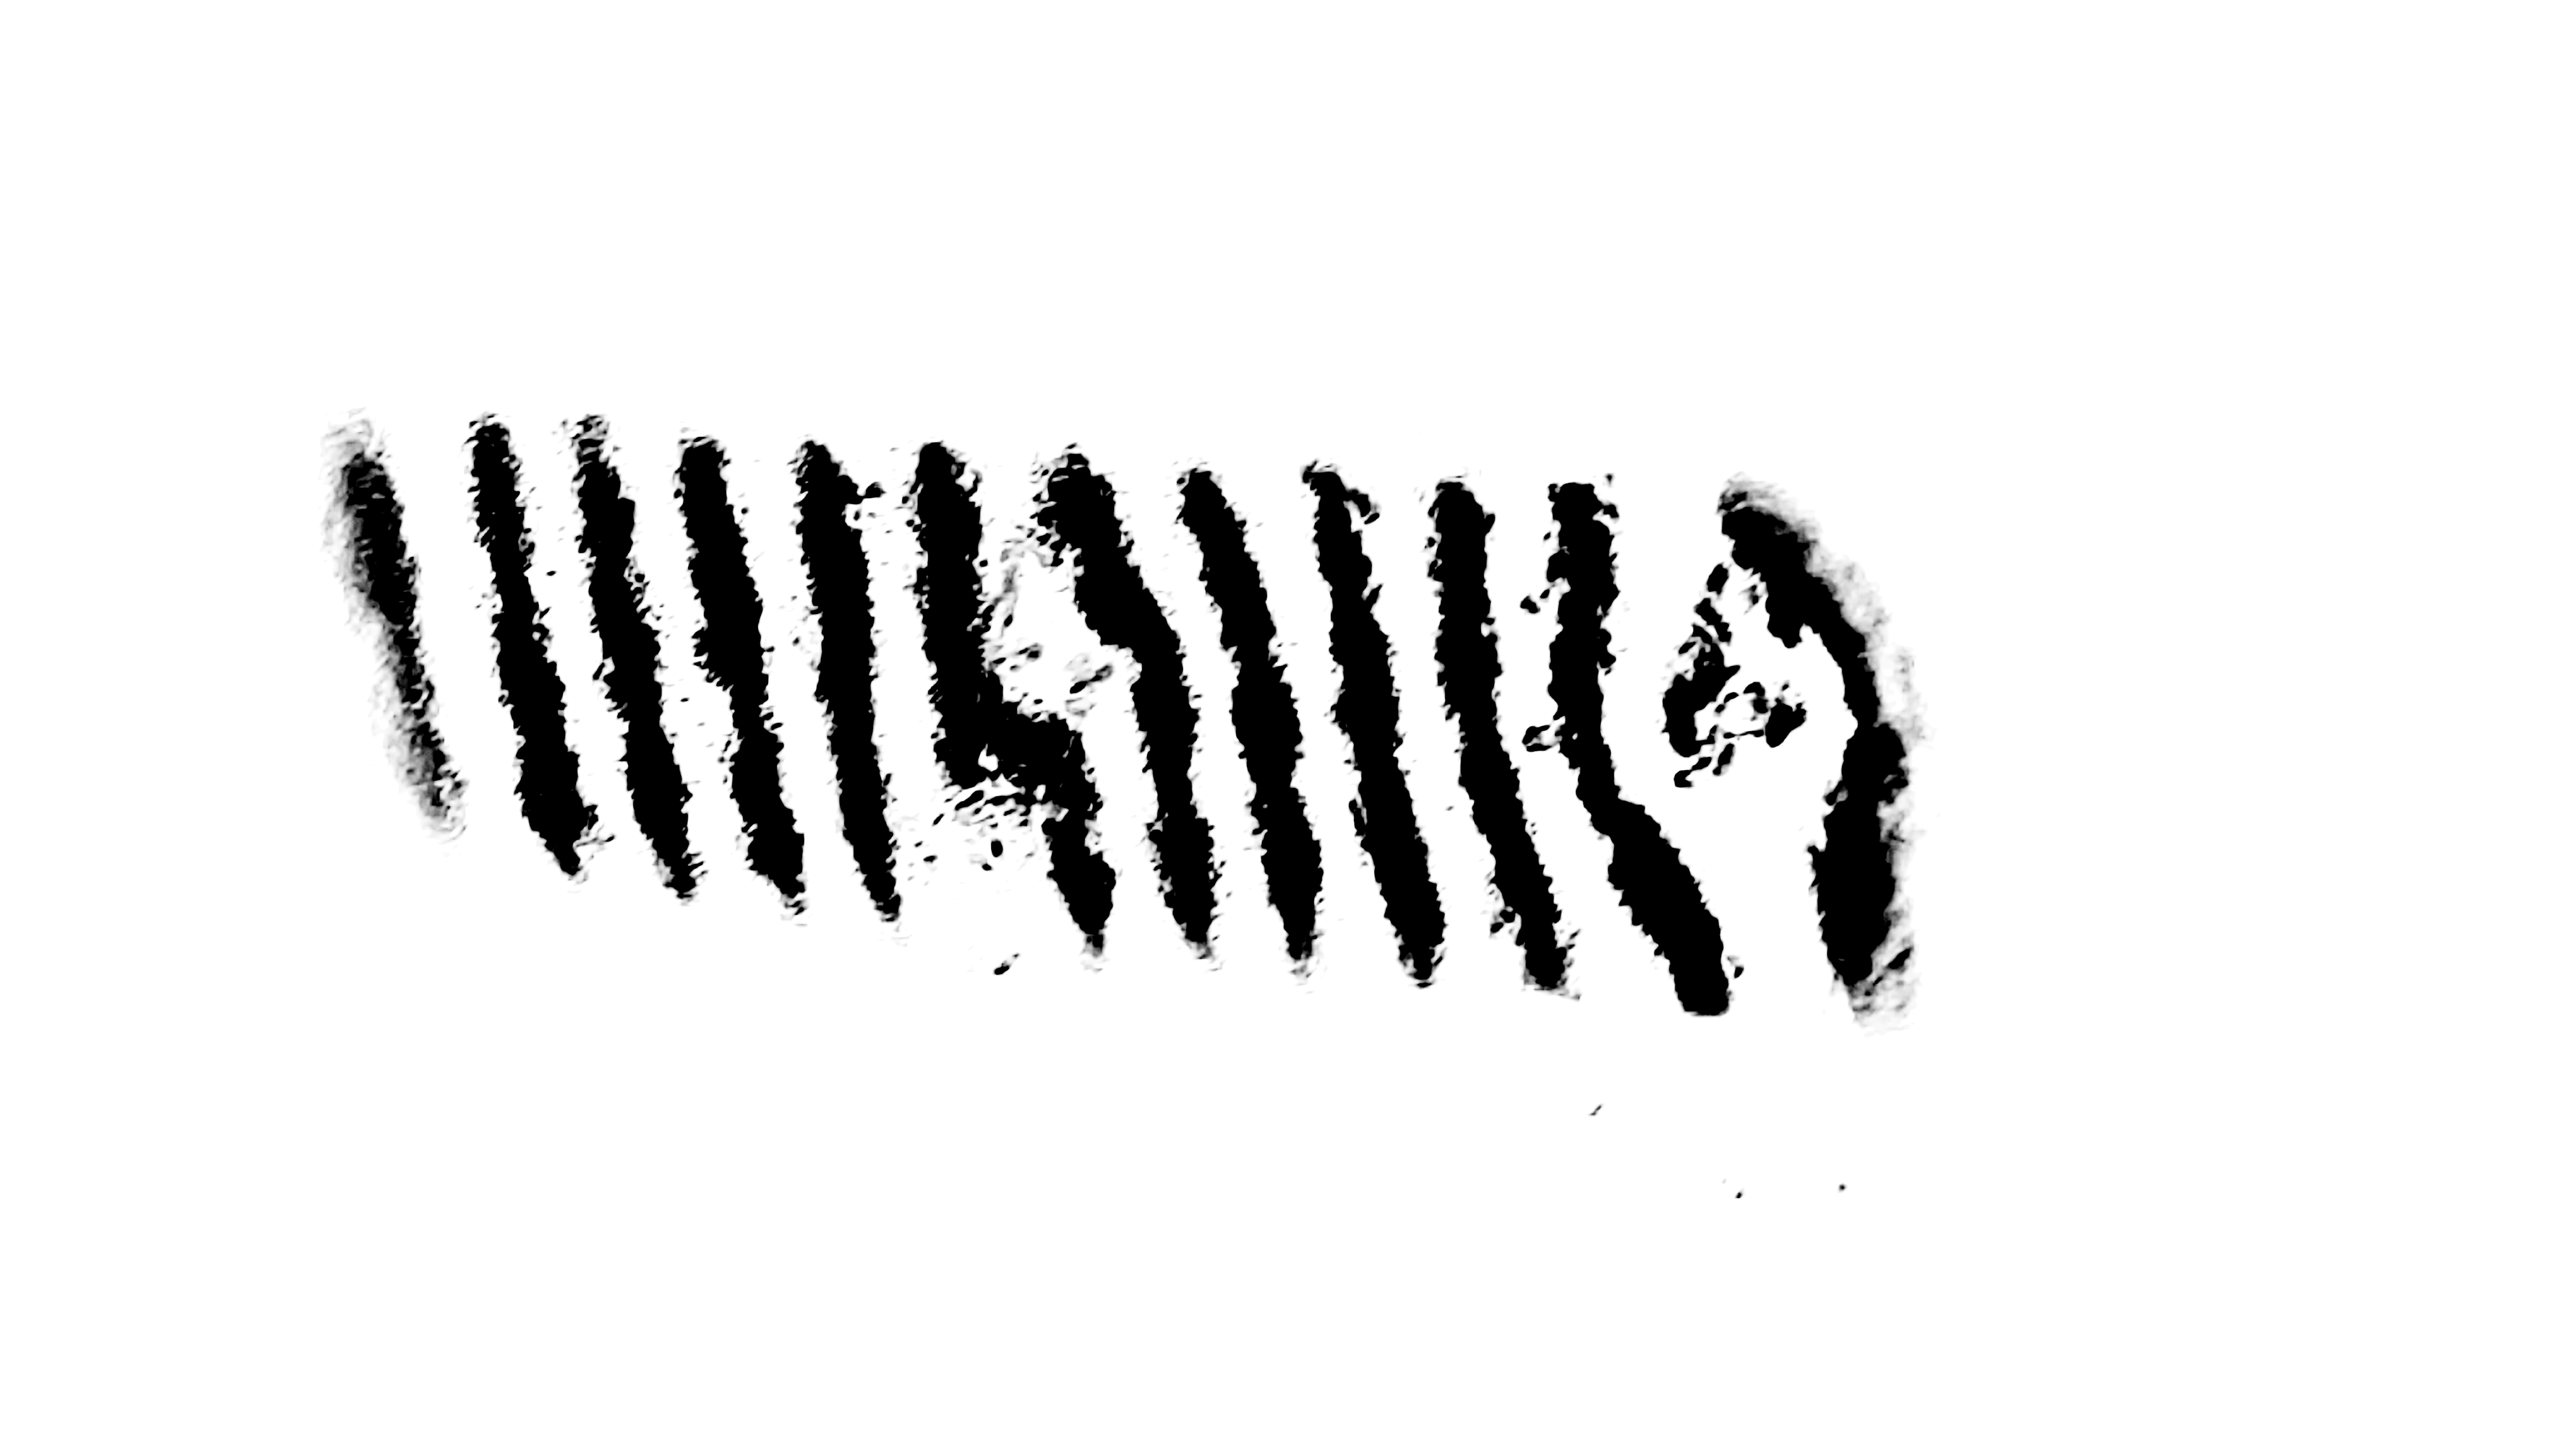

In [18]:
ps_new_inv

### Dilation and erosion -grid search / openning is need between them

In [19]:
# opening = erosion -> dilation
# closing = dilation -> closing

(-0.5, 5311.5, 2987.5, -0.5)

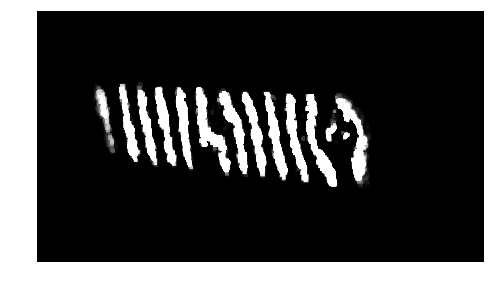

In [20]:
plt.figure()

plt.imshow(ndimage.grey_erosion(ndimage.grey_dilation(ps_new_inv,30),35))

plt.axis('off')

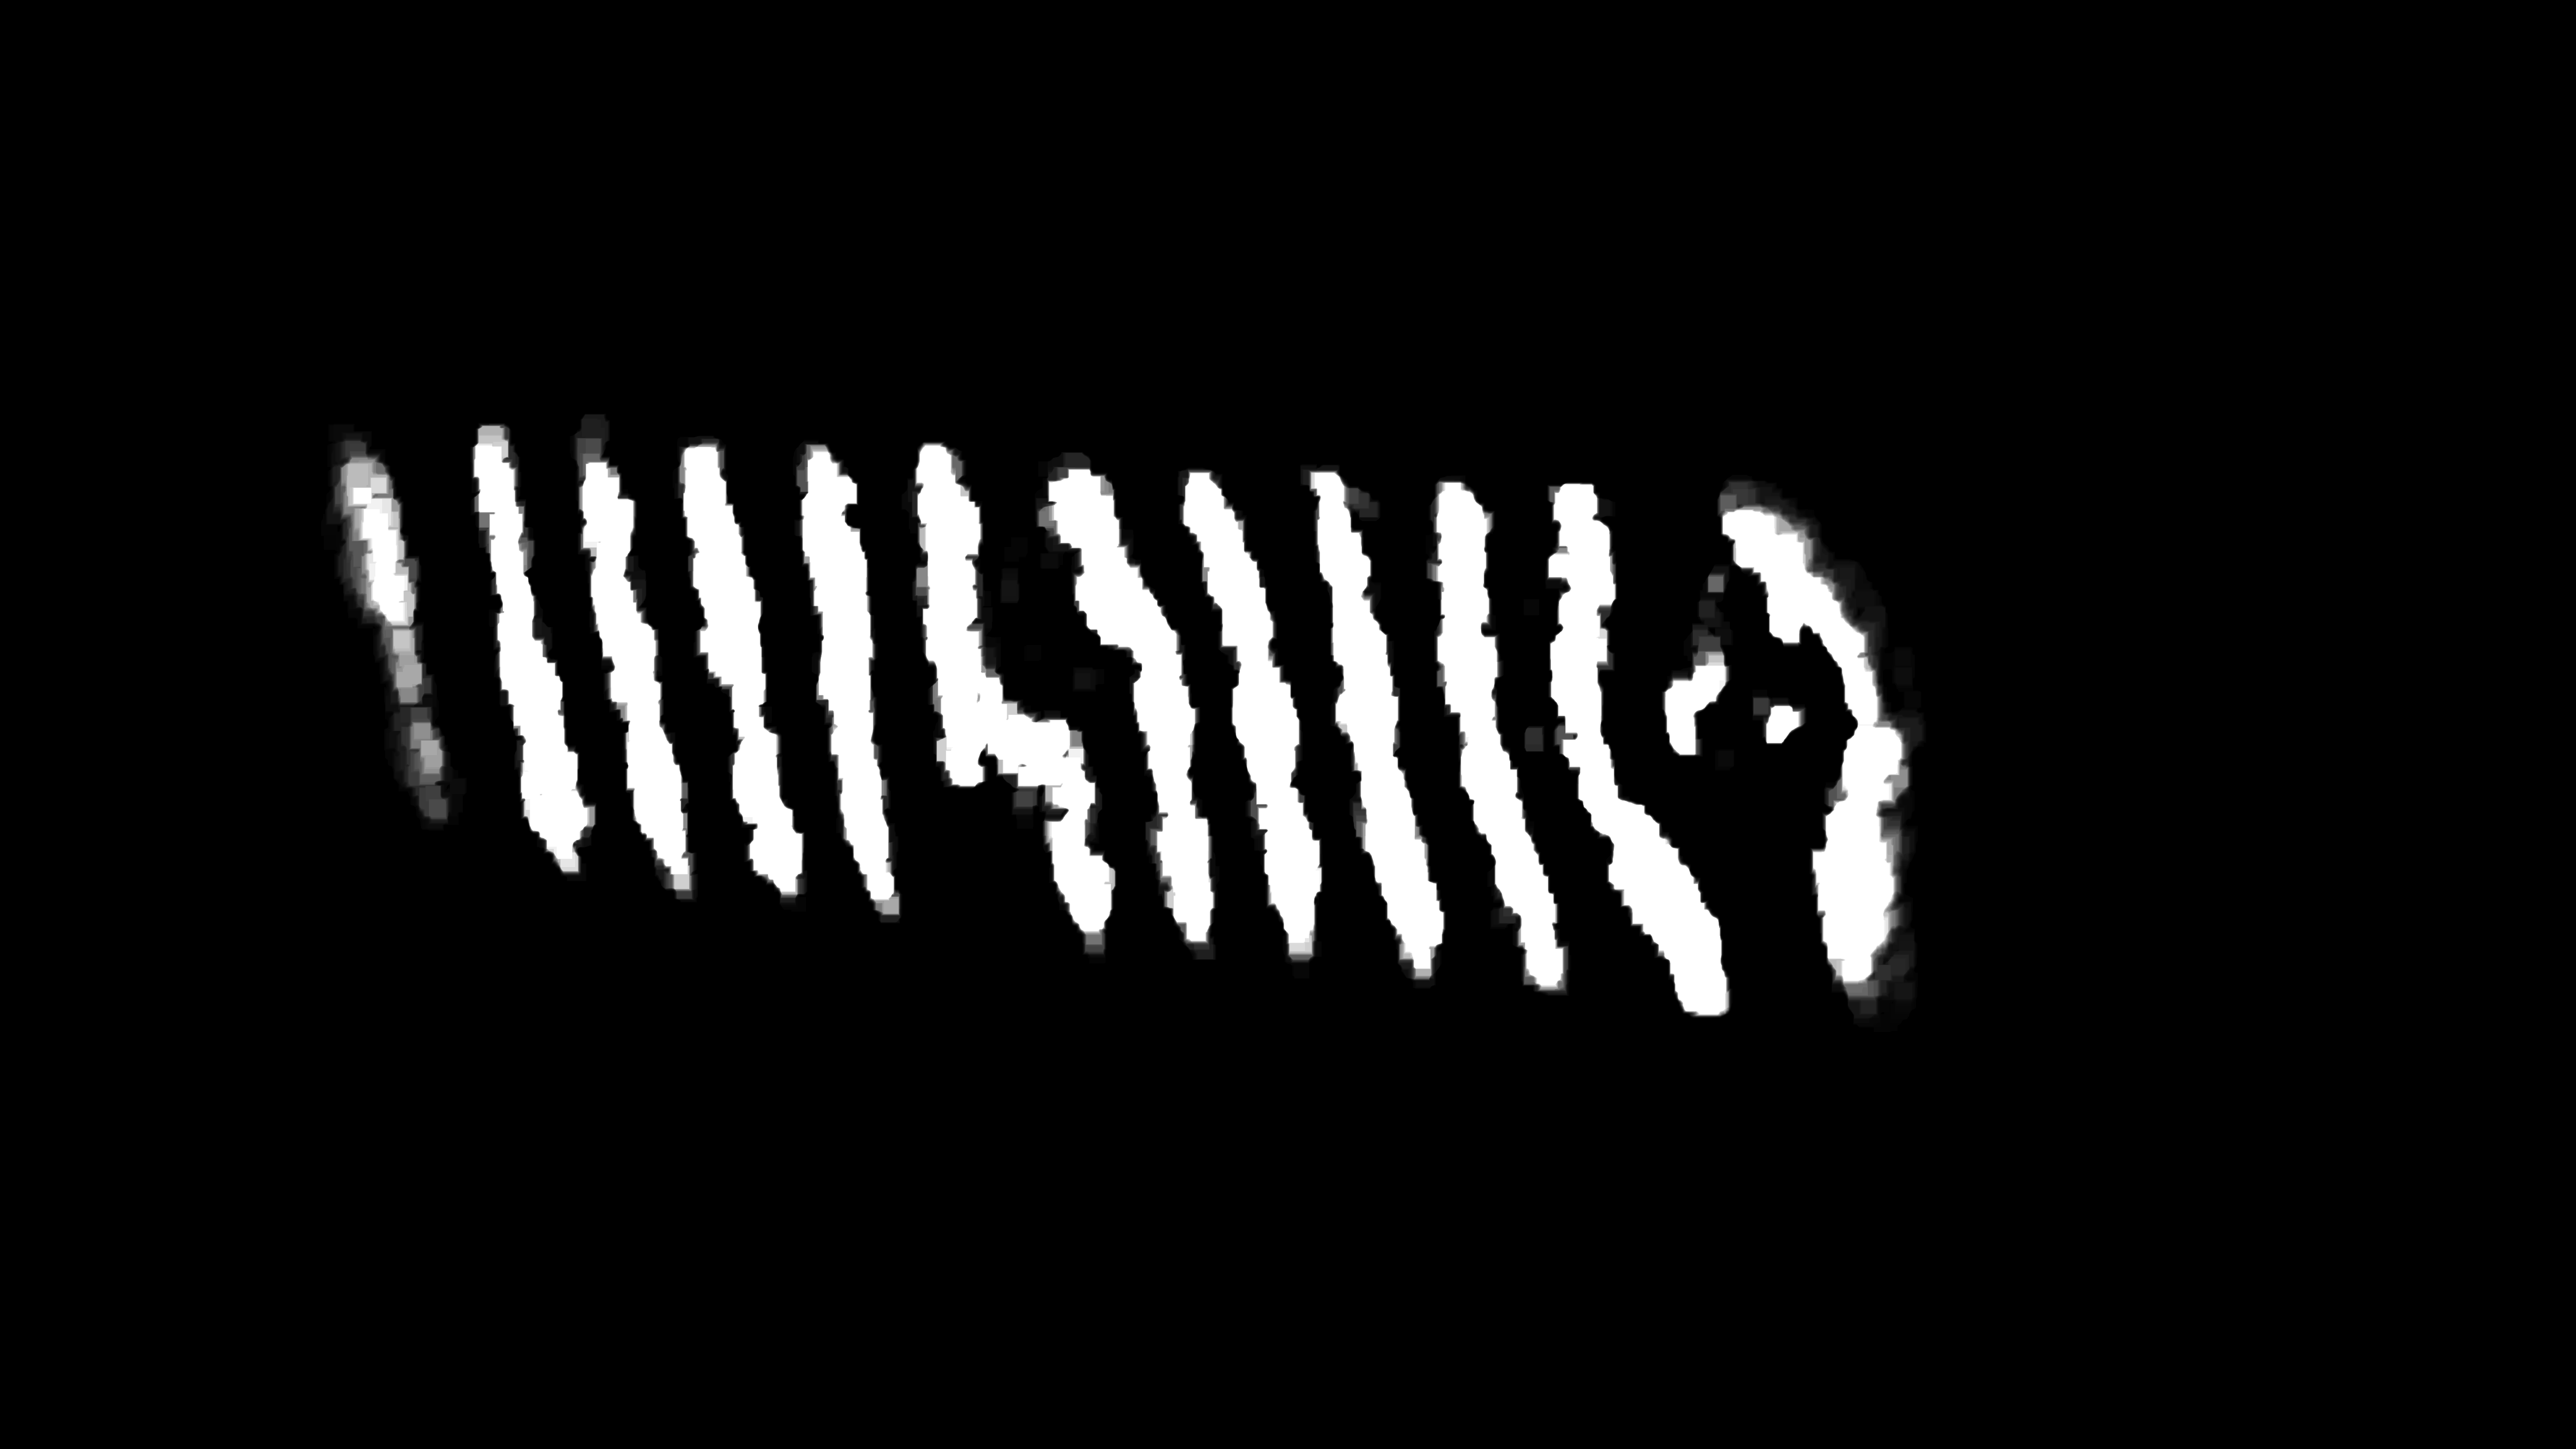

In [21]:
qwer = PIL.Image.fromarray(ndimage.grey_opening(ps_new2,30))
qwer

In [22]:
# erosion and dilation
def grey_ero_dil (x,iterat = 3, n_ero = 30, n_dil=20):
    for i in range(iterat):
        
        e = ndimage.grey_erosion(x, n_ero)
        #,structure=[[0,1,2],[0,2,0],[1,2,0]]

        r= ndimage.grey_dilation(e, n_dil)

    return r

In [23]:
gogo = grey_ero_dil(ps_new2,iterat=5,n_ero=30, n_dil=35)

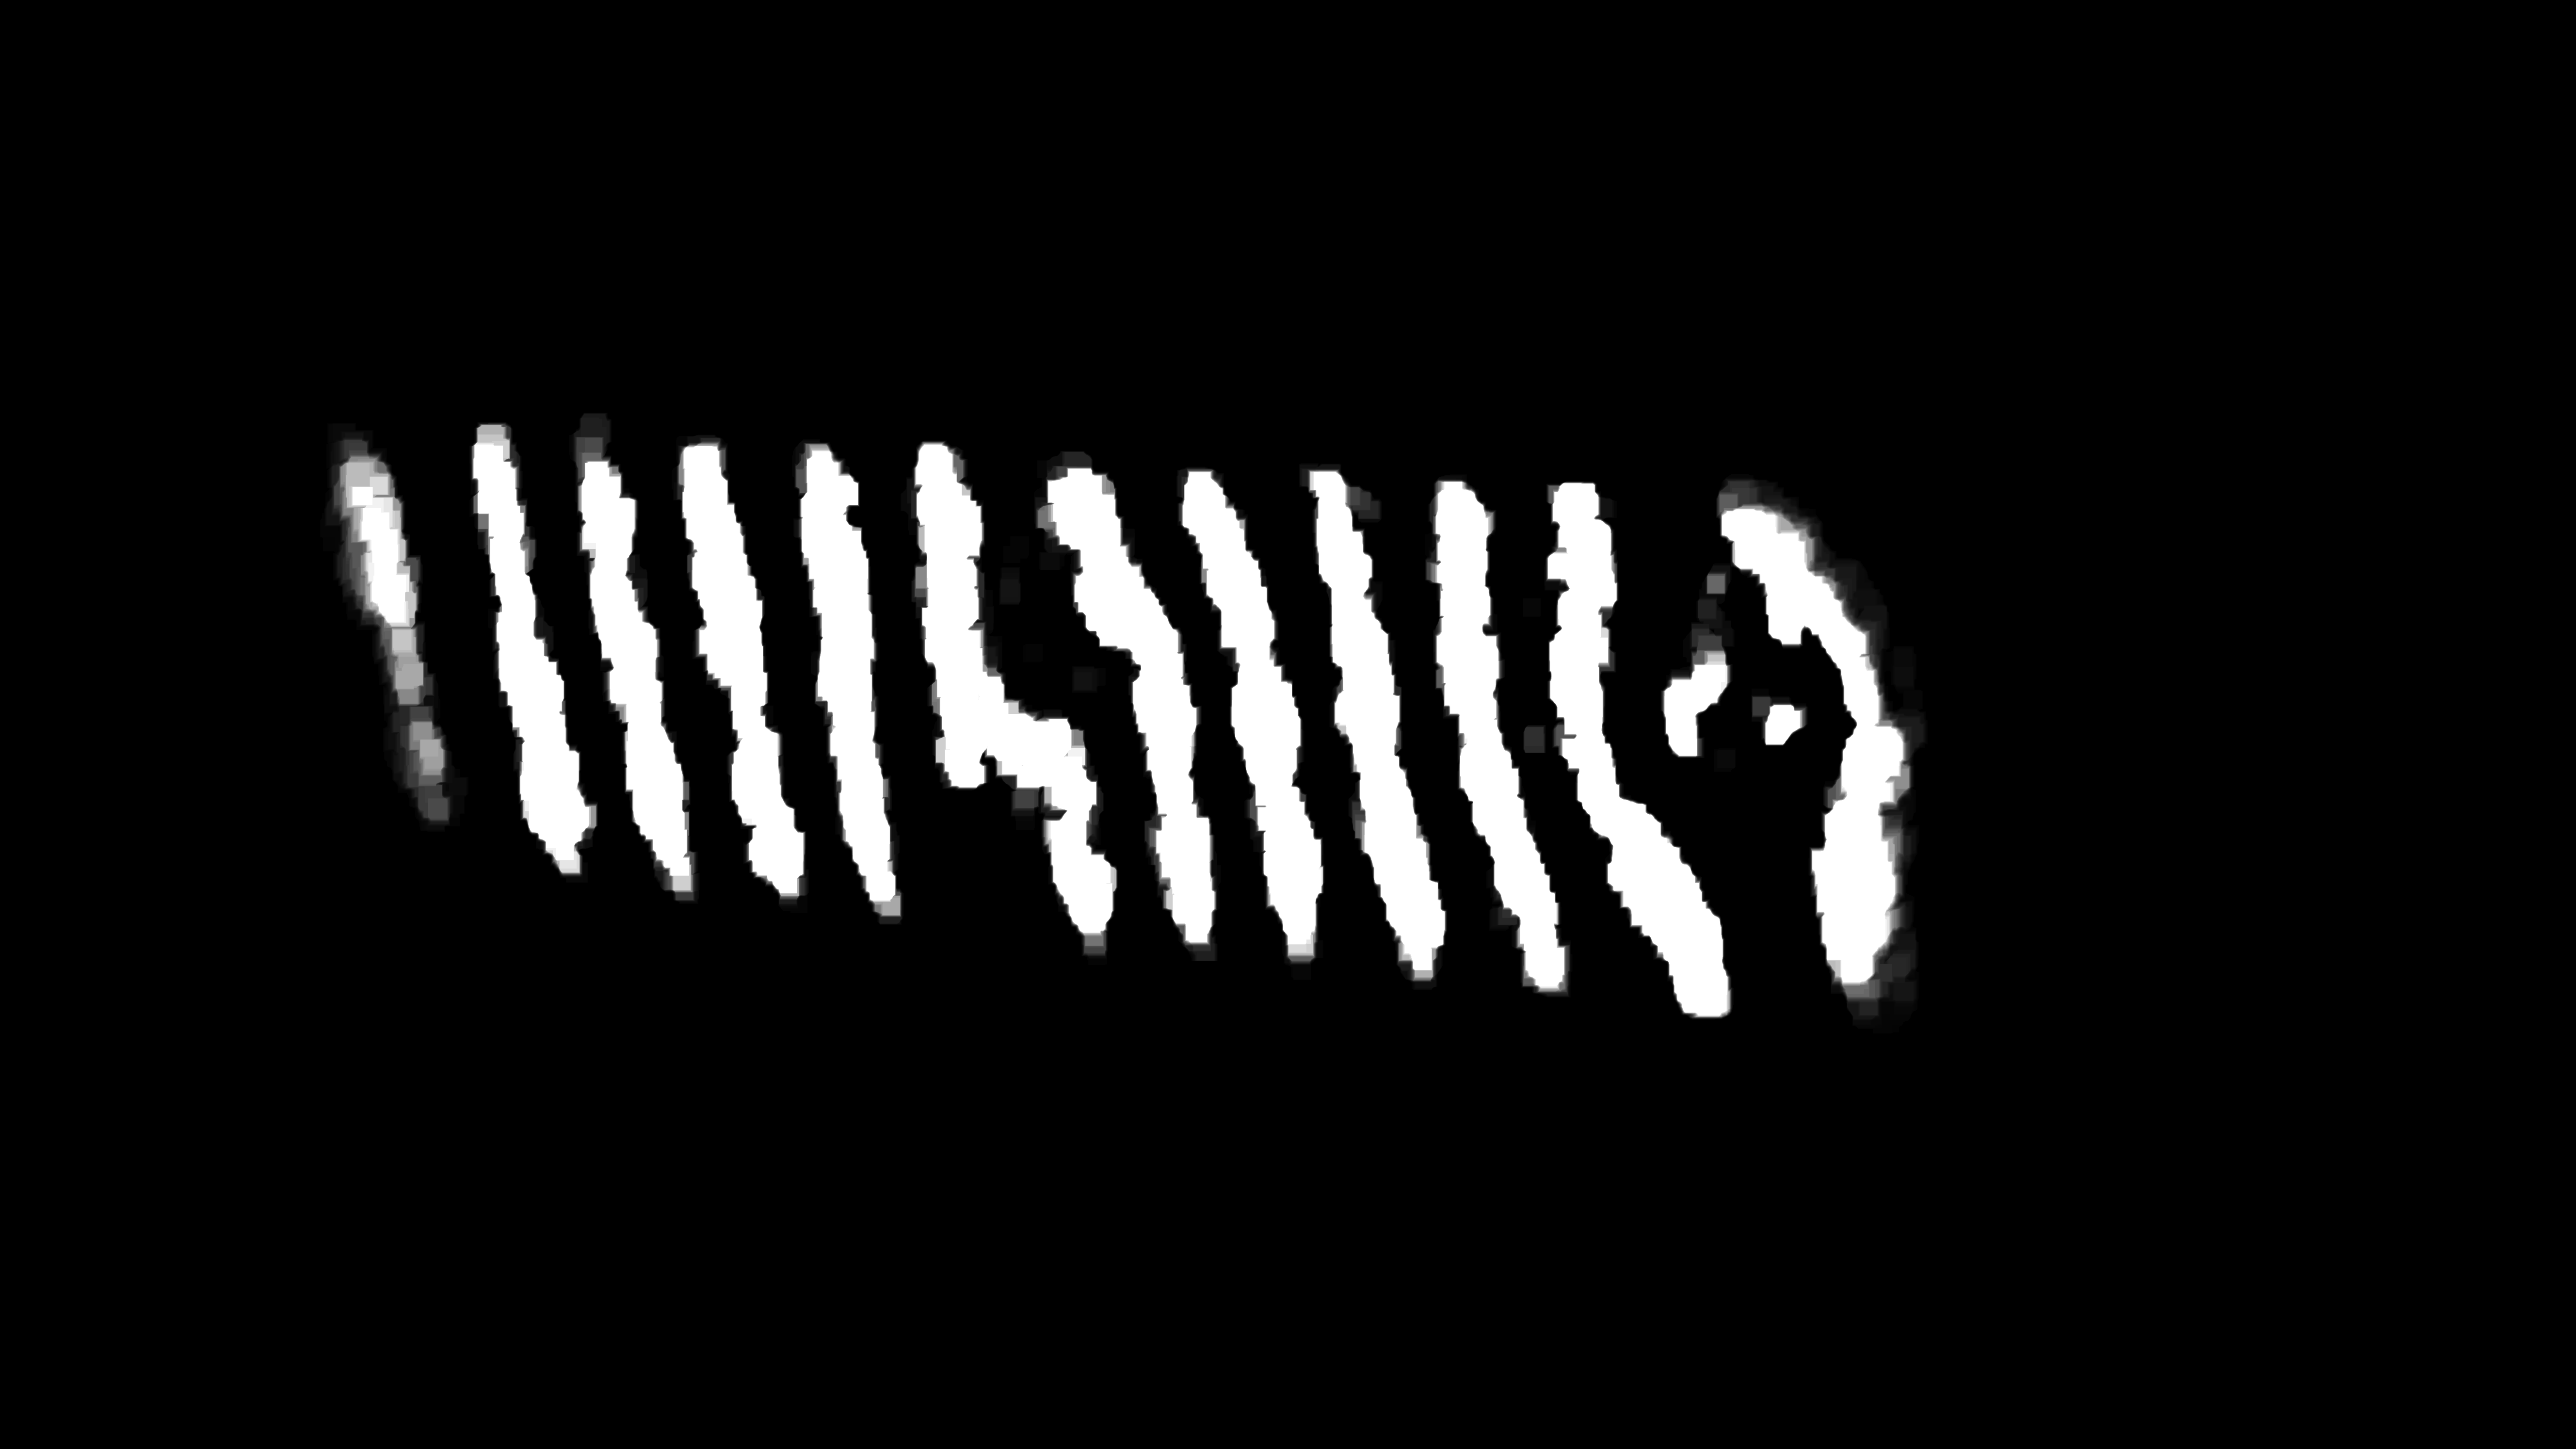

In [24]:
ssss = PIL.Image.fromarray(gogo)
ssss

## Labeling for getting $n$ object

### Edge and contour

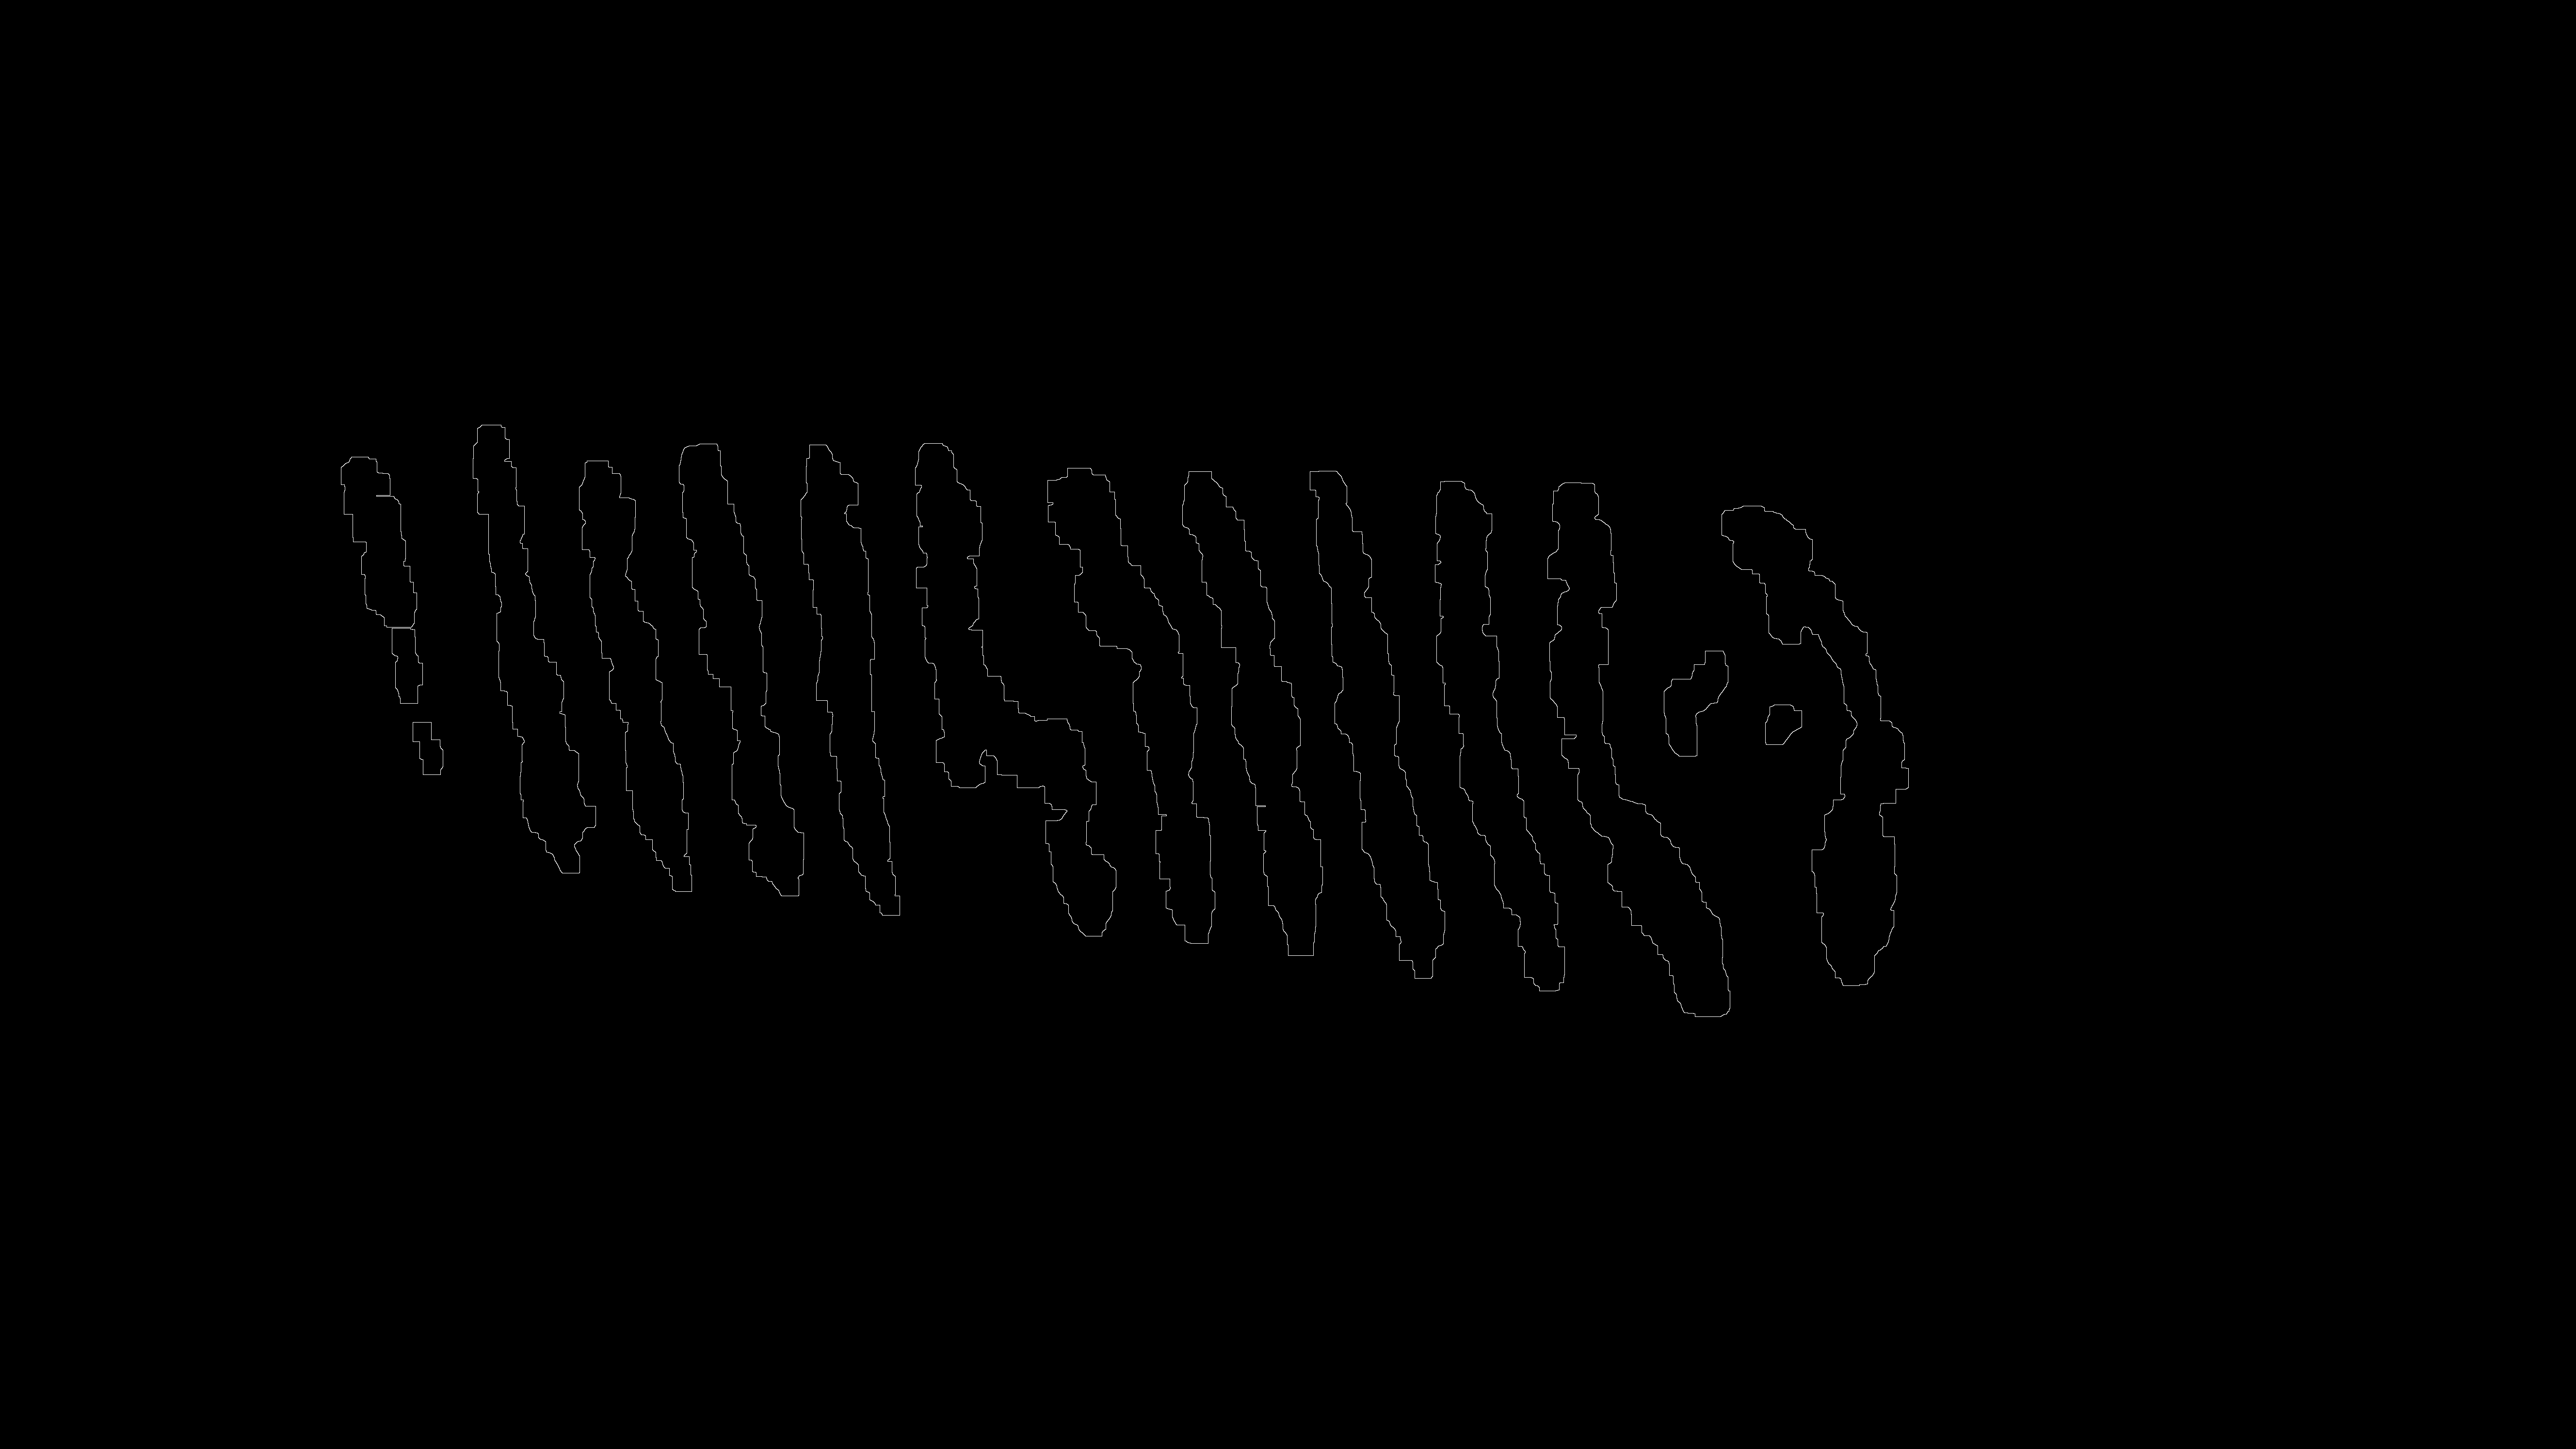

In [29]:
d1= ssss.point(lambda c : 255 if c >127 else 0)
d1
dddd= d1.filter(PIL.ImageFilter.FIND_EDGES())
dddd

In [33]:
dddd.getbbox()

(703, 876, 3936, 2097)

In [37]:
find_rect2(np.array(PIL.ImageOps.invert(dddd)))

left is  703
upper is  876
right is  3936
bottom is  2097


[703, 876, 3936L, 2097L]

In [32]:
find_rect2(np.array(dddd))


[]

### Binaraize

In [ ]:
ffff= ssss.point(lambda c : 255 if c >127 else 0)
ffff

### Objectize by finding edges

In [ ]:
ff2= ffff.filter(PIL.ImageFilter.FIND_EDGES)
ff2=ff2.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
ff2

In [ ]:
from PIL import ImageDraw

In [ ]:
imd = ImageDraw.Draw(ff2)
# ff2.getbbox()

In [ ]:
im2=imd.rectangle(ff2.getbbox(),outline=128)
im2

In [ ]:
ssss.crop(ff2.getbbox())

In [ ]:
ff2

In [ ]:
ff3= ffff.filter(PIL.ImageFilter.CONTOUR)
ff3

In [ ]:
ffffr = PIL.ImageOps.invert(ffff)

In [ ]:
ff2r = PIL.ImageOps.invert(ff2)

In [ ]:
ff3r = PIL.ImageOps.invert(ff3)

In [ ]:
ff2r

In [ ]:
xc = [[1,1,1],[1,0,1],[1,1,1]]

In [ ]:
z,x = ndimage.measurements.label(ff2r,xc)
z,x

In [ ]:
np.unique(z)

In [ ]:
plt.figure(figsize=((15,15))
plt.imshow(z)

In [ ]:
#object로 인지된 것들이 각각 어떻게 형성되어 있는지 확인
for i in range(0,x+1):
    plt.figure(figsize=(15,15))
    plt.imshow(z==i)

##  Crop

###  Getting rectangular point for original img

In [27]:
def find_rect2(x,margin = 0):
    '''return left upper right bottom'''
    ##TODO: margin을 percentile 로 적용, and 16:9 비율을 유지하도록 하는 방법 생각

    rect = []
    x_sum_1=x.sum(axis=1)
    x_sum_0=x.sum(axis=0)
    for j,i in  enumerate(x_sum_0):
        if i != x_sum_0[1] & i != 0 :
            print("left is ",j)
            rect.append(j-margin)
            break
    for j,i in  enumerate(x_sum_1):
        if i != x_sum_1[1] & i != 0:
            print("upper is ",j)
            rect.append(j-margin)
            break

    for j,i in  enumerate(reversed(x_sum_0)):
        if i != x_sum_0[-2] & i != 0:
            print("right is ",x.shape[1]-j)
            rect.append(x.shape[1]-j+margin)
            break

    for j,i in  enumerate(reversed(x_sum_1)):
        if i != x_sum_1[-2] & i != 0:
            print("bottom is ",x.shape[0]-j)
            rect.append(x.shape[0]-j+margin)
            break
    return rect

In [ ]:
rect = find_rect2(z,0)

### Crop original img by rect point

In [ ]:
ee = ps_new2.crop(rect)

In [ ]:
ee.size[0]/ee.size[1]

In [ ]:
ee.save(path+'/none.jpg')

In [ ]:
ps_new2.crop(rect).resize((50,50))

In [ ]:
plt.imshow(z)

In [ ]:
zz = PIL.Image.fromarray(z*255,'1')

In [ ]:
len(z.sum(axis=0))

In [ ]:
#!start c:\users\back_jud\anaconda2\lib\site-packages\pandas\core\config.py
#판다스 출력 설정

In [ ]:
plt.imshow(z)

In [ ]:
max_size = [0,0]
for imgs in get_files :
    imPath = path + imgs
    img = PIL.Image.open(imPath)
    img = img.point(lambda x : 255*(x/255)**13)
    img_c = img.convert('L') 
    img_ic = PIL.ImageOps.invert(img_c)
    img_ic = grey_ero_dil(img_ic,iterat=10, n_ero=10,n_dil= 40)
    img_bic = make_bw(PIL.Image.fromarray(img_ic))
    img_bic = img_bic.filter(PIL.ImageFilter.FIND_EDGES)
    img_bicr = PIL.ImageOps.invert(img_bic)
    lab_arr,num_lab = ndimage.measurements.label(img_bicr,structure=[[1,1,1],[1,0,1],[1,1,1]])
    print("object의 갯수 : " ,imgs, num_lab)
    idx_crop =  find_rect2(lab_arr,margin=200)
    im_final = img_c.crop(idx_crop)
    if im_final.size[0] > max_size[0]:
        max_size[0] = im_final.size[0]
    if im_final.size[1] > max_size[1]:
        max_size[1] = im_final.size[1]

    im_final.save(path+'test/'+imgs)
    
for imgs in listdir(path+'/test'):
    img = PIL.open(path+'/test/'+imgs)
    img

In [ ]:
Pa.resize((50,50),resample=PIL.Image.BICUBIC)

In [ ]:
im_final